In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

c:\Users\makan\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [12]:
import os
from PIL import Image
# from IPython.display import display


import warnings
warnings.filterwarnings("ignore")

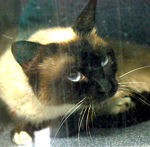

In [13]:
with Image.open(r'C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\3. CNN\data\CATS_DOGS\test\CAT\9394.jpg') as img:
    display(img)
    

In [4]:
path = r"C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\3. CNN\data\CATS_DOGS"

In [17]:
img_names = []


for folder, subfolder, fileName in os.walk(path):
    for img in fileName:
        img_names.append(folder+'\\'+img)

In [18]:
len(img_names)

24994

In [19]:
img_names[0]

'C:\\terme 8\\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\\13 . trains\\pytorch\\3. CNN\\data\\CATS_DOGS\\test\\CAT\\10000.jpg'

In [8]:
# Start by creating a list
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print(f'Images:  {len(img_sizes)}')
print(f'Rejects: {len(rejected)}')

Images:  24994
Rejects: 0


In [9]:
df = pd.DataFrame(img_sizes)

In [10]:
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [11]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

In [21]:
dog=Image.open('../3. CNN/data/CATS_DOGS/train/DOG/0.jpg')

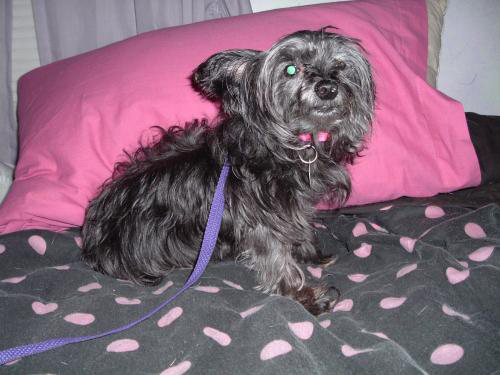

In [22]:
display(dog)

In [23]:
dog.size

(500, 375)

In [24]:
type(dog)

PIL.JpegImagePlugin.JpegImageFile

In [25]:
dog.getpixel((0,0))

(117, 115, 126)

In [44]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
    
])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 224, 224])


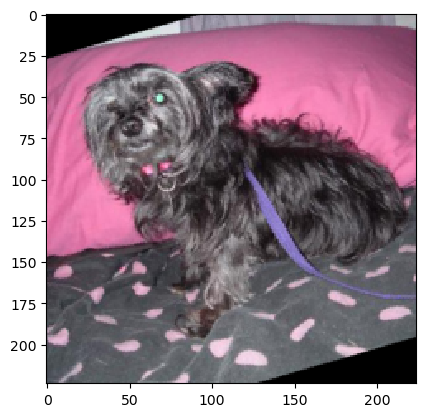

In [45]:
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [32]:
im

tensor([[[0.4588, 0.4667, 0.4588,  ..., 0.5255, 0.5216, 0.5176],
         [0.4667, 0.4706, 0.4627,  ..., 0.5294, 0.5333, 0.5294],
         [0.4745, 0.4784, 0.4706,  ..., 0.5333, 0.5373, 0.5333],
         ...,
         [0.2627, 0.2863, 0.2863,  ..., 0.2745, 0.3059, 0.3020],
         [0.2824, 0.2745, 0.2824,  ..., 0.3059, 0.2941, 0.2745],
         [0.2745, 0.2627, 0.2667,  ..., 0.2784, 0.2667, 0.2627]],

        [[0.4510, 0.4588, 0.4510,  ..., 0.5294, 0.5216, 0.5176],
         [0.4588, 0.4627, 0.4549,  ..., 0.5373, 0.5333, 0.5294],
         [0.4667, 0.4706, 0.4627,  ..., 0.5412, 0.5373, 0.5333],
         ...,
         [0.2824, 0.3059, 0.3098,  ..., 0.3020, 0.3373, 0.3333],
         [0.3020, 0.2941, 0.3059,  ..., 0.3373, 0.3255, 0.3059],
         [0.2941, 0.2824, 0.2863,  ..., 0.3059, 0.2980, 0.2941]],

        [[0.4941, 0.5098, 0.5059,  ..., 0.5725, 0.5608, 0.5569],
         [0.5020, 0.5137, 0.5098,  ..., 0.5804, 0.5725, 0.5686],
         [0.5098, 0.5216, 0.5176,  ..., 0.5843, 0.5765, 0.